In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

**Importing the dataset**

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
display(df)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
del df['User ID']
df['Gender'] = df['Gender'].map({'Male':1,"Female":0})
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [6]:
X = df[['Gender', 'Age','EstimatedSalary']].values # fts
y = df['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) # train- test split

**Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler # importing the required function
sc = StandardScaler() #initialis
sc.fit(X_train) # find the values of mu and sigma
X_train = sc.transform(X_train)
X_test = sc.transform(X_test) #only transform the test dataset, dont fit it

In [8]:
X_train.shape

(300, 3)

**Fitting Decision Tree Classification to the Training set**

In [10]:
from sklearn.tree import DecisionTreeClassifier

# initiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

**Predicting the Test set results**

In [11]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

Test set accuracy: 0.91
Test set auc: 0.91


C:\Users\kolte\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


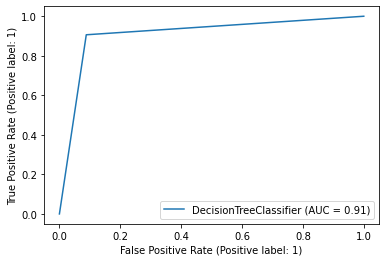

In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
y_pred = dt.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)

In [14]:
k = pd.DataFrame(y_test,columns=['Y_test'])
k2 = pd.DataFrame(y_pred,columns=['Y_pred'])
final = pd.concat((k,k2),axis=1)
final

,Y_test,Y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,1
96,0,0
97,1,1
98,1,1


**Making the Confusion Matrix**

In [15]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

Text(42.0, 0.5, 'Truth')

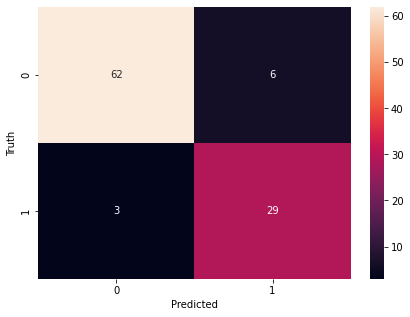

In [16]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Visualising the Training set results**

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [18]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

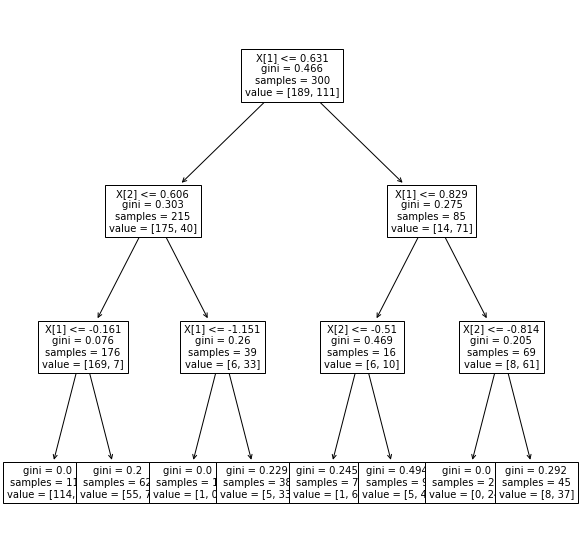

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

**Visualising the Test set results**

[Text(0.49085365853658536, 0.9615384615384616, 'X[1] <= 0.631\ngini = 0.466\nsamples = 300\nvalue = [189, 111]'),
 Text(0.25, 0.8846153846153846, 'X[2] <= 0.606\ngini = 0.303\nsamples = 215\nvalue = [175, 40]'),
 Text(0.10975609756097561, 0.8076923076923077, 'X[1] <= -0.161\ngini = 0.076\nsamples = 176\nvalue = [169, 7]'),
 Text(0.08536585365853659, 0.7307692307692307, 'gini = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(0.13414634146341464, 0.7307692307692307, 'X[2] <= 0.403\ngini = 0.2\nsamples = 62\nvalue = [55, 7]'),
 Text(0.10975609756097561, 0.6538461538461539, 'X[2] <= -0.06\ngini = 0.153\nsamples = 60\nvalue = [55, 5]'),
 Text(0.08536585365853659, 0.5769230769230769, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.13414634146341464, 0.5769230769230769, 'X[2] <= 0.027\ngini = 0.285\nsamples = 29\nvalue = [24, 5]'),
 Text(0.10975609756097561, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15853658536585366, 0.5, 'X[2] <= 0.259\ngini = 0.245\nsamples = 28\nvalue =

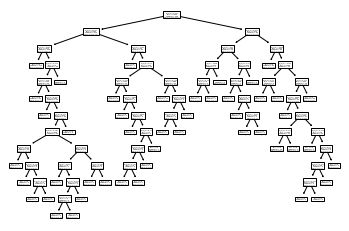

In [20]:
from sklearn import tree
tree.plot_tree(dt)